In [35]:
import pandas as pd

df=pd.read_csv('/content/housing.csv')



In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

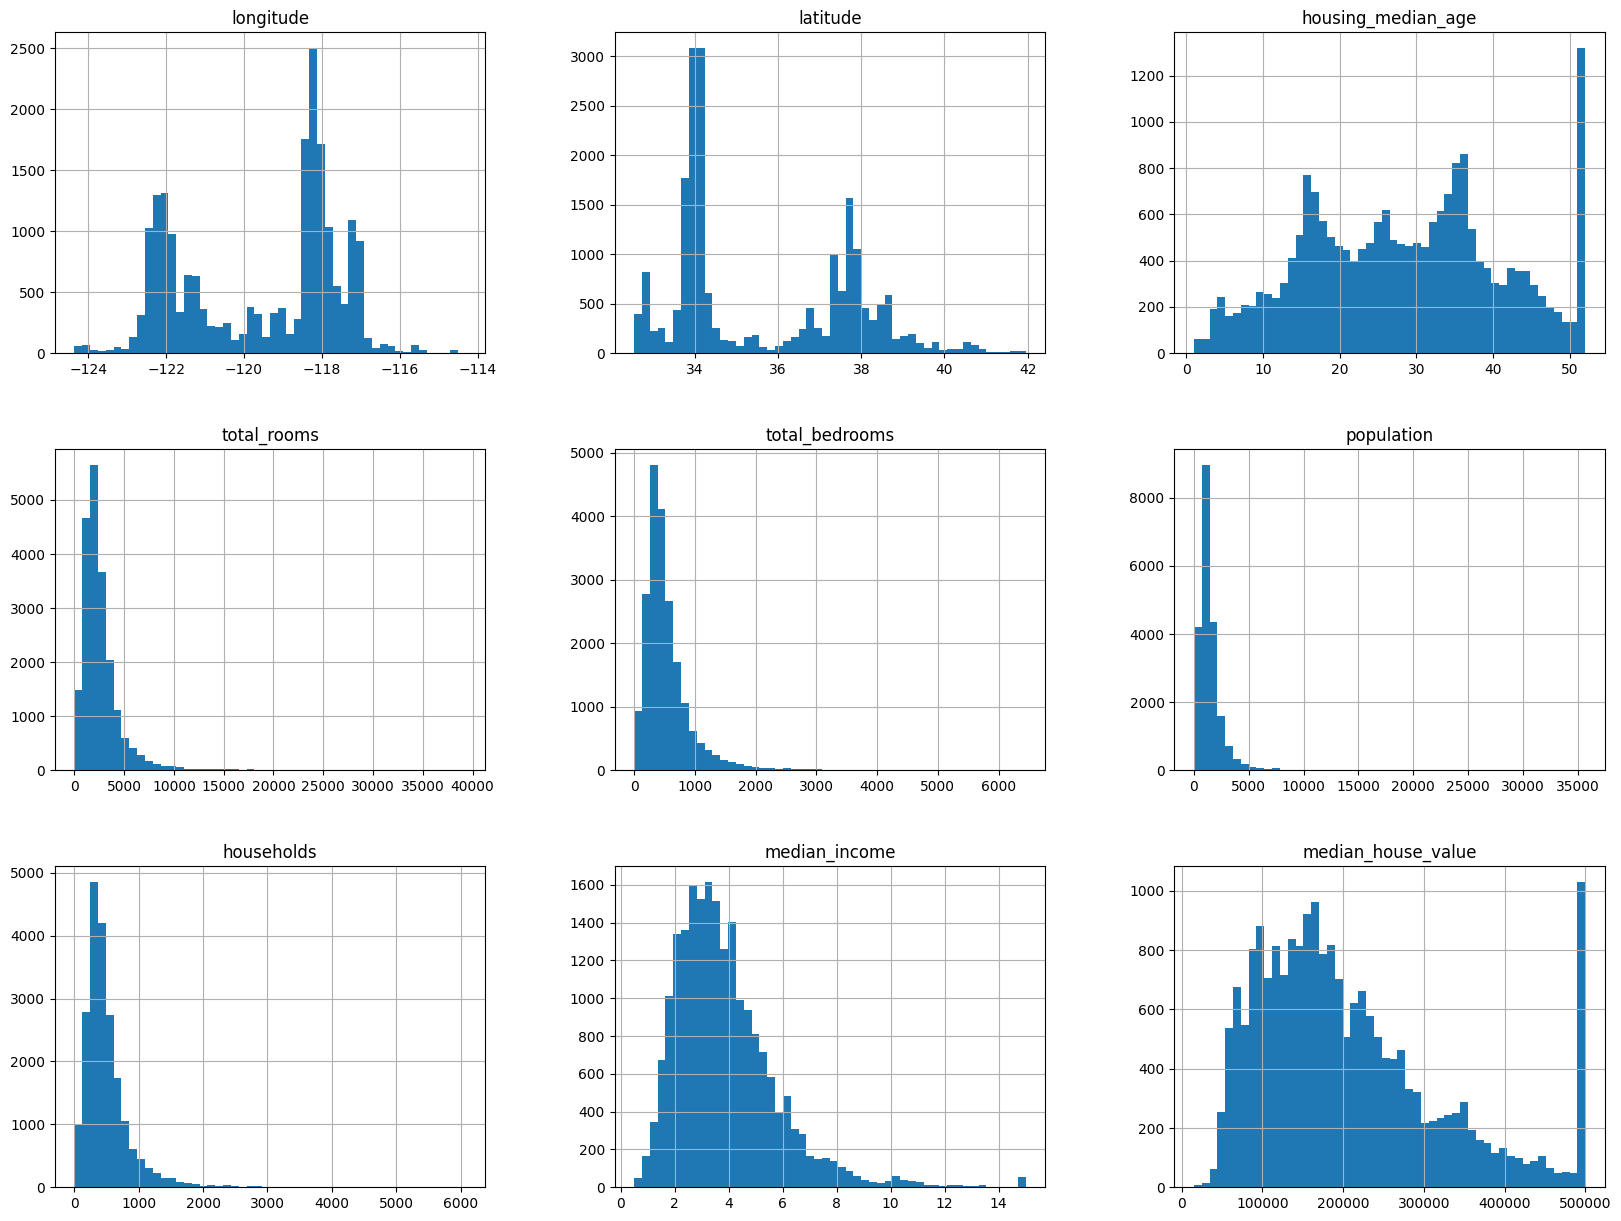

In [8]:
df.hist(bins=50,figsize=(20,15))

In [32]:
from sklearn.model_selection import train_test_split


X = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']



train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df['ocean_proximity'])


Geographical Features: ['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']
ocean_proximity
<1H OCEAN     240084.285464
INLAND        124805.392001
ISLAND        380440.000000
NEAR BAY      259212.311790
NEAR OCEAN    249433.977427
Name: median_house_value, dtype: float64


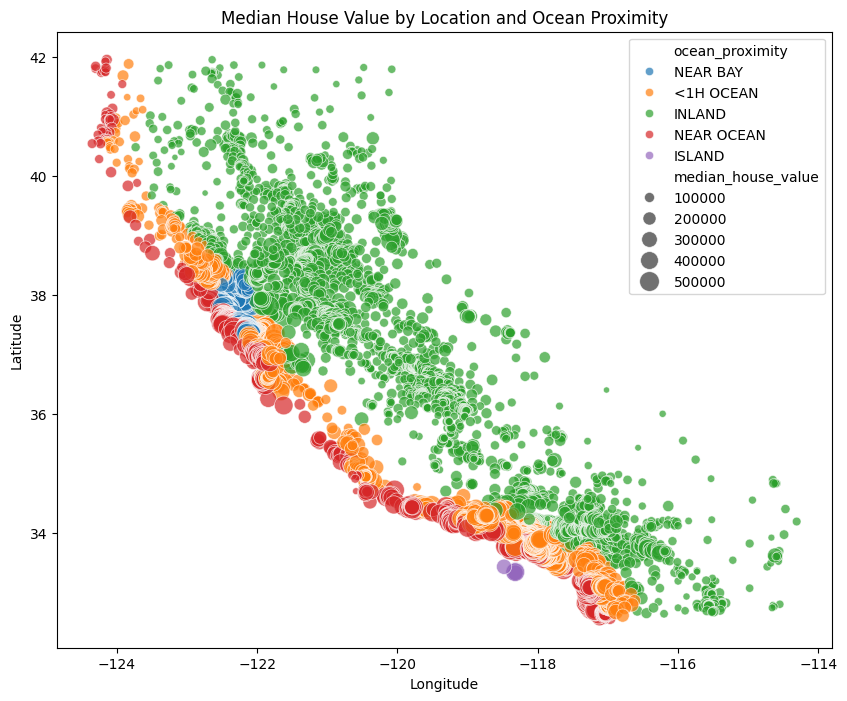

In [33]:


import matplotlib.pyplot as plt
import seaborn as sns

geographical_features = df['ocean_proximity'].unique()
print("Geographical Features:", geographical_features)




average_prices = df.groupby('ocean_proximity')['median_house_value'].mean()
print(average_prices)


plt.figure(figsize=(10,8))
sns.scatterplot(x='longitude', y='latitude', data=df, hue='ocean_proximity', size='median_house_value', sizes=(20, 200), alpha=0.7)

plt.title("Median House Value by Location and Ocean Proximity")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

Feature with maximum correlation to median_house_value: median_income
Correlation value: 0.6880752079585577


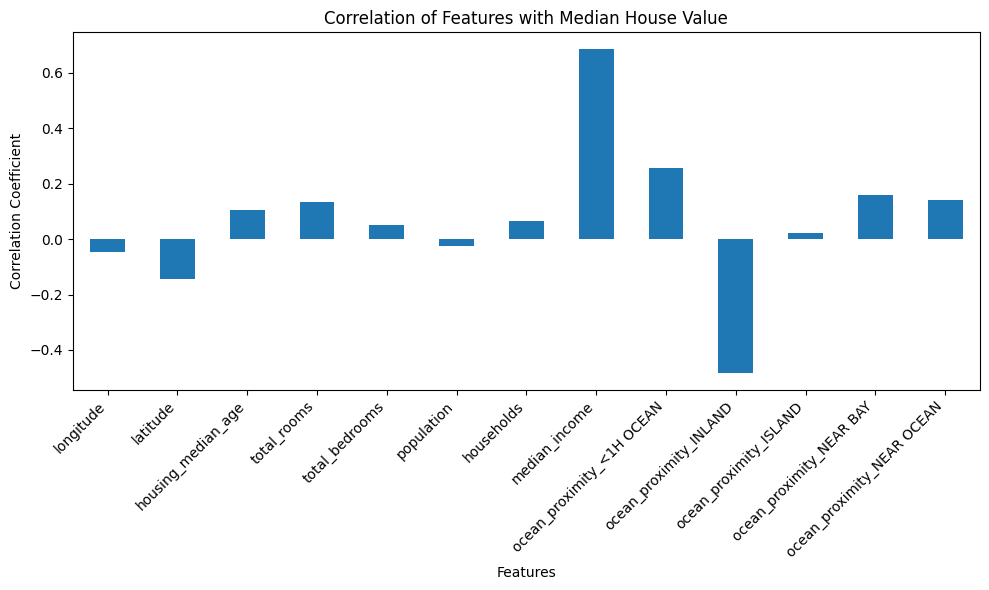

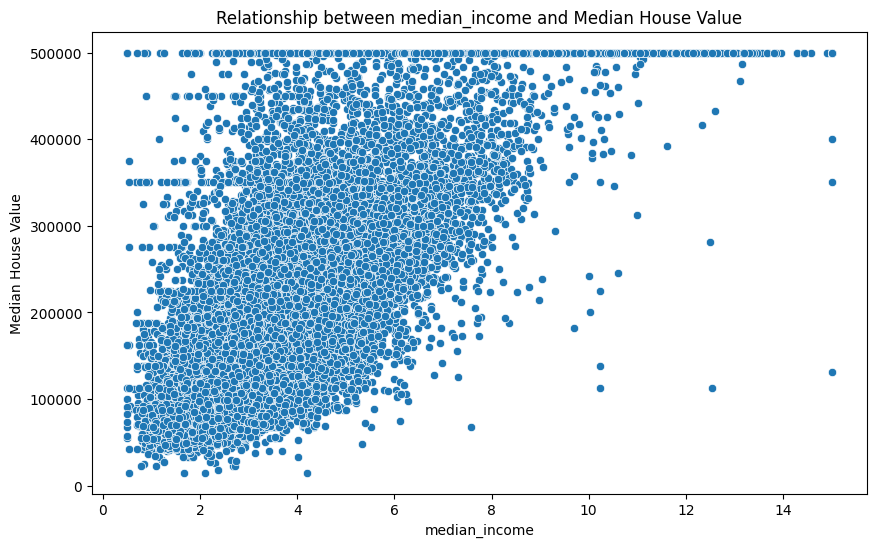

In [36]:
df1 = pd.get_dummies(df,columns=['ocean_proximity'])
corr_matrix = df1.corr()


correlation_with_price = corr_matrix['median_house_value'].drop('median_house_value')


max_correlated_feature = correlation_with_price.abs().idxmax()
max_correlation_value = correlation_with_price[max_correlated_feature]

print(f"Feature with maximum correlation to median_house_value: {max_correlated_feature}")
print(f"Correlation value: {max_correlation_value}")


plt.figure(figsize=(10, 6))
correlation_with_price.plot(kind='bar')
plt.title('Correlation of Features with Median House Value')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(x=max_correlated_feature, y='median_house_value', data=df1)
plt.title(f'Relationship between {max_correlated_feature} and Median House Value')
plt.xlabel(max_correlated_feature)
plt.ylabel('Median House Value')
plt.show()


Feature with maximum correlation to median_house_value: median_income
Correlation value: 0.6880752079585577


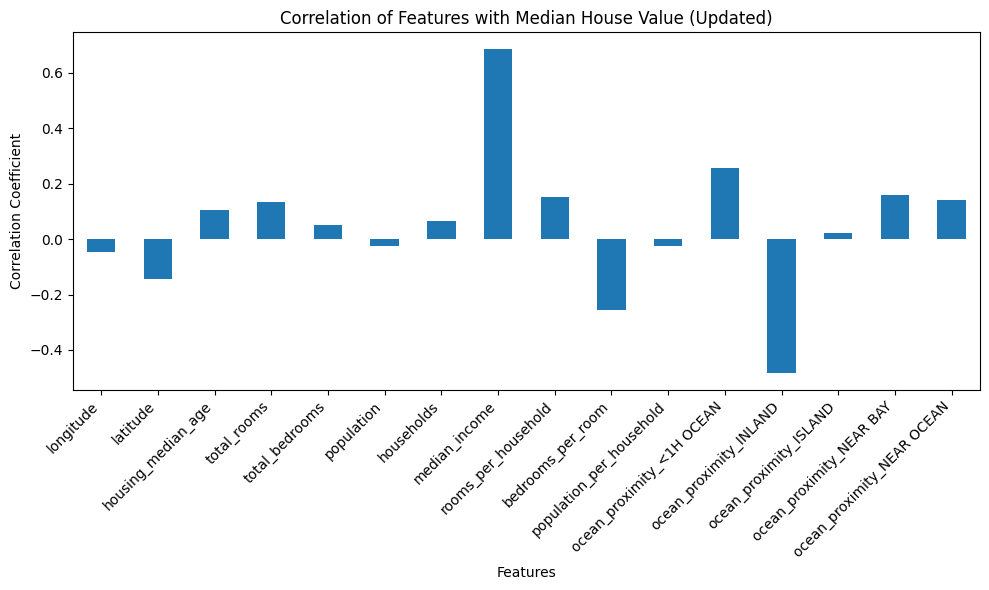

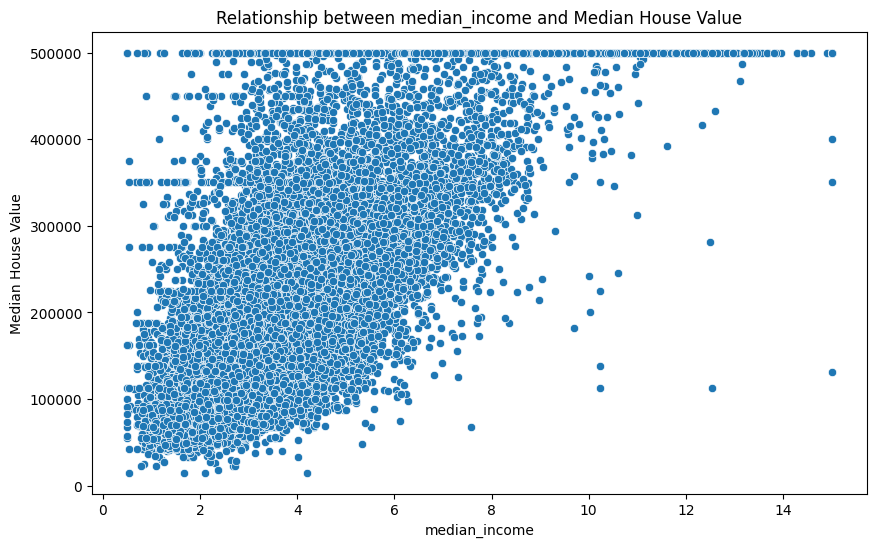

In [37]:

df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']


df2 = pd.get_dummies(df, columns=['ocean_proximity'])
corr_matrix = df2.corr()
correlation_with_price = corr_matrix['median_house_value'].drop('median_house_value')


max_correlated_feature = correlation_with_price.abs().idxmax()
max_correlation_value = correlation_with_price[max_correlated_feature]

print(f"Feature with maximum correlation to median_house_value: {max_correlated_feature}")
print(f"Correlation value: {max_correlation_value}")

plt.figure(figsize=(10, 6))
correlation_with_price.plot(kind='bar')
plt.title('Correlation of Features with Median House Value (Updated)')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=max_correlated_feature, y='median_house_value', data=df2)
plt.title(f'Relationship between {max_correlated_feature} and Median House Value')
plt.xlabel(max_correlated_feature)
plt.ylabel('Median House Value')
plt.show()


In [38]:

print(df.isnull().sum())

median_total_bedrooms = df['total_bedrooms'].median()
df['total_bedrooms'].fillna(median_total_bedrooms, inplace=True)

print(df.isnull().sum())

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms              207
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity               0
rooms_per_household           0
bedrooms_per_room           207
population_per_household      0
dtype: int64
longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity               0
rooms_per_household           0
bedrooms_per_room           207
population_per_household      0
dtype: int64


<ipython-input-38-1eecc088c005>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(median_total_bedrooms, inplace=True)
